In [13]:
#Libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#EDA

df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
print(df.shape)
print(df.info())

(253680, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  

<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

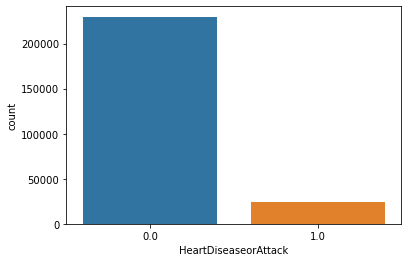

In [5]:
sns.countplot(data=df, x ='HeartDiseaseorAttack')

<AxesSubplot:>

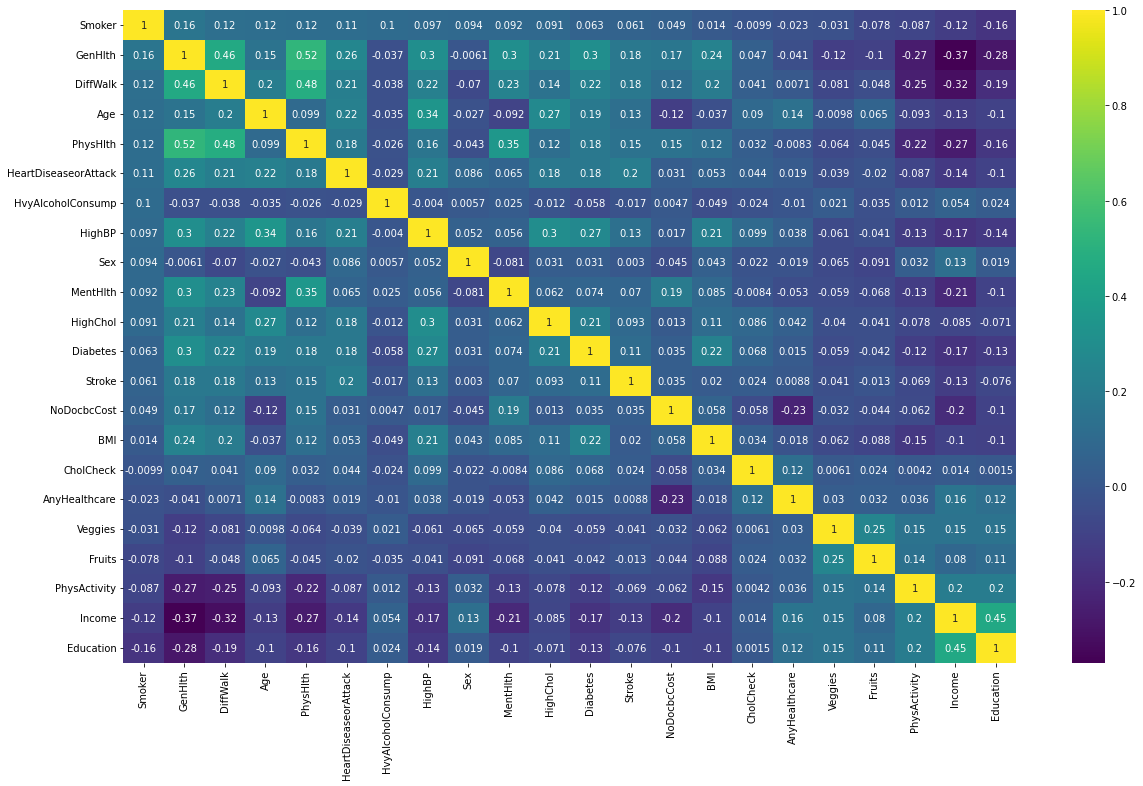

In [3]:
#Correlation Matrix
k = 22 
cols = df.corr().nlargest(k, 'Smoker')['Smoker'].index
cm = df[cols].corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [4]:
# convert BMI
for i in range(len(df)):
    if df.loc[i]['BMI'] <  18.5:
        df.loc[i]['BMI'] = 1
    elif 18.5 <= df.loc[i]['BMI'] < 25:
        df.loc[i]['BMI'] = 2
    elif 25 <= df.loc[i]['BMI'] < 30:
        df.loc[i]['BMI'] = 3
    elif 30 <= df.loc[i]['BMI'] < 35:
        df.loc[i]['BMI'] = 4
    elif 35 <= df.loc[i]['BMI'] < 40:
        df.loc[i]['BMI'] = 5
    else:
        df.loc[i]['BMI'] = 6
        
# convert MentHlth
for i in range(len(df)):
    if df.loc[i]['MentHlth'] <= 5 :
        df.loc[i]['MentHlth'] = 1
    elif 5 < df.loc[i]['MentHlth'] <= 11:
        df.loc[i]['MentHlth'] = 2
    elif 11 < df.loc[i]['MentHlth'] <= 17:
        df.loc[i]['MentHlth'] = 3
    elif 17 < df.loc[i]['MentHlth'] <= 23:
        df.loc[i]['MentHlth'] = 4
    else:
        df.loc[i]['MentHlth'] = 5

# convert PhysHlth
for i in range(len(df)):
    if df.loc[i]['PhysHlth'] <= 5:
        df.loc[i]['PhysHlth'] = 1
    elif 5 < df.loc[i]['PhysHlth'] <= 11:
        df.loc[i]['PhysHlth'] = 2
    elif 11 < df.loc[i]['PhysHlth'] <= 17:
        df.loc[i]['PhysHlth'] = 3
    elif 17 < df.loc[i]['PhysHlth'] <= 23:
        df.loc[i]['PhysHlth'] = 4
    else:
        df.loc[i]['PhysHlth'] = 5

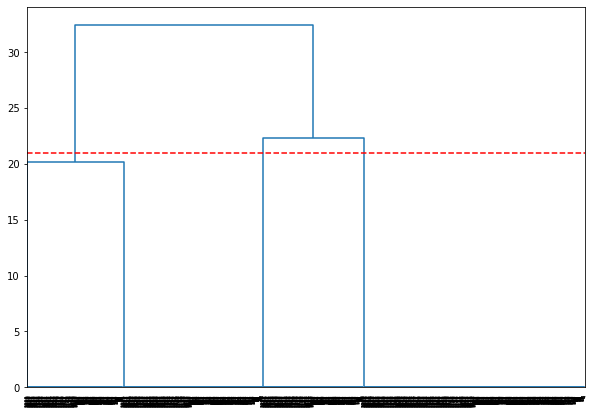

In [26]:
newdf = df.sample(2000) 
X = pd.DataFrame(newdf, index = newdf.index, columns = newdf.columns)
X = X[['HighBP','HighChol']]

linked = linkage(X, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           color_threshold=-1,
           orientation='top',
           )
plt.axhline(y=21, color='r', linestyle='--')
plt.show()

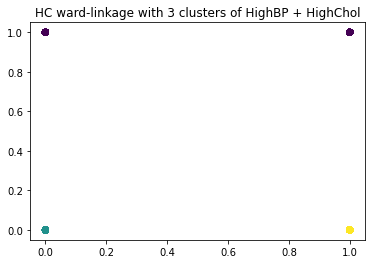

In [27]:
HCward=AgglomerativeClustering(n_clusters=3, linkage='ward')

HCward.fit(X)

plt.scatter(X.values[:, 0], X.values[:, 1], c=HCward.labels_, cmap='viridis')

plt.title('HC ward-linkage with 3 clusters of HighBP + HighChol')
plt.show()


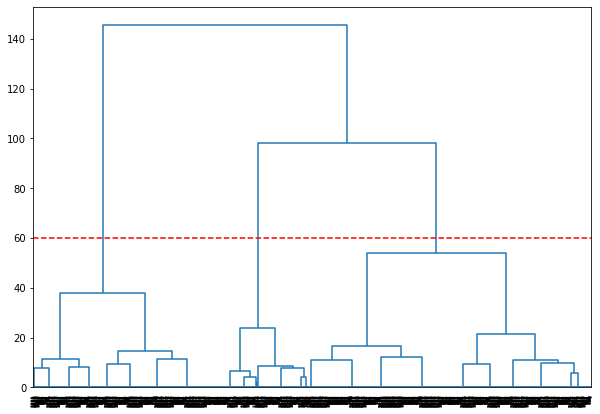

In [28]:
newdf = df.sample(2000) 
X = pd.DataFrame(newdf, index = newdf.index, columns = newdf.columns)
X = X[['Age','HighChol']]


linked = linkage(X, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           color_threshold=-1,
           orientation='top',
           )
plt.axhline(y=60, color='r', linestyle='--')
plt.show()

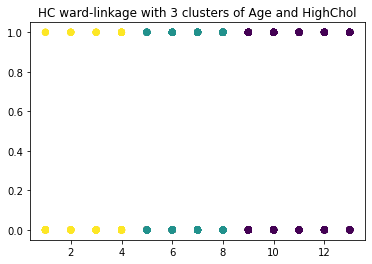

In [25]:
HCward=AgglomerativeClustering(n_clusters=3, linkage='ward')

HCward.fit(X)

plt.scatter(X.values[:, 0], X.values[:, 1], c=HCward.labels_, cmap='viridis')

plt.title('HC ward-linkage with 3 clusters of Age + HighChol')
plt.show()


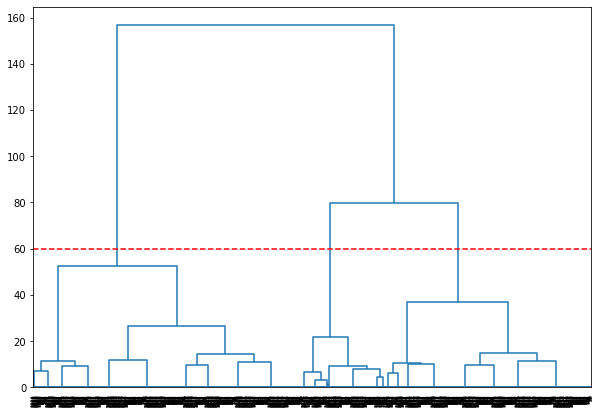

In [22]:
newdf = df.sample(2000) 
X = pd.DataFrame(newdf, index = newdf.index, columns = newdf.columns)
X = X[['Age','HighBP']]


linked = linkage(X, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           color_threshold=-1,
           orientation='top',
           )
plt.axhline(y=60, color='r', linestyle='--')
plt.show()

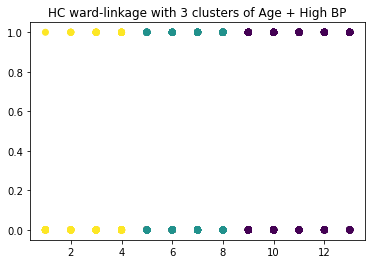

In [23]:
HCward=AgglomerativeClustering(n_clusters=3, linkage='ward')

HCward.fit(X)

plt.scatter(X.values[:, 0], X.values[:, 1], c=HCward.labels_, cmap='viridis')

plt.title('HC ward-linkage with 3 clusters of Age + High BP')
plt.show()

In [32]:
pcadf = StandardScaler().fit_transform(df)
pca = PCA(n_components=0.9)
pca_result = pca.fit_transform(pcadf)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.18670212 0.11158943 0.09435729 0.04778656 0.04624829 0.04518895
 0.04149868 0.03789887 0.03699898 0.03528009 0.03277373 0.0317534
 0.03020347 0.02939709 0.02914246 0.02855215 0.02790685 0.02686422]


[Text(0.5, 1.0, 'PCA of Heart Disease or Attack')]

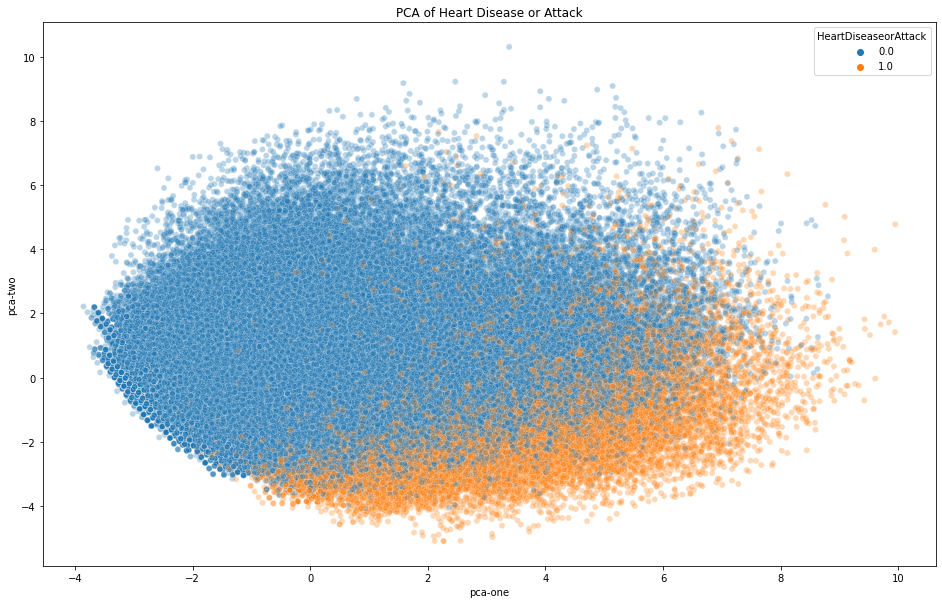

In [41]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two", hue= "HeartDiseaseorAttack",
    data=df,
    legend="full",
    alpha=0.3
).set(title='PCA of Heart Disease or Attack')

[Text(0.5, 1.0, 'PCA of High Cholesterol')]

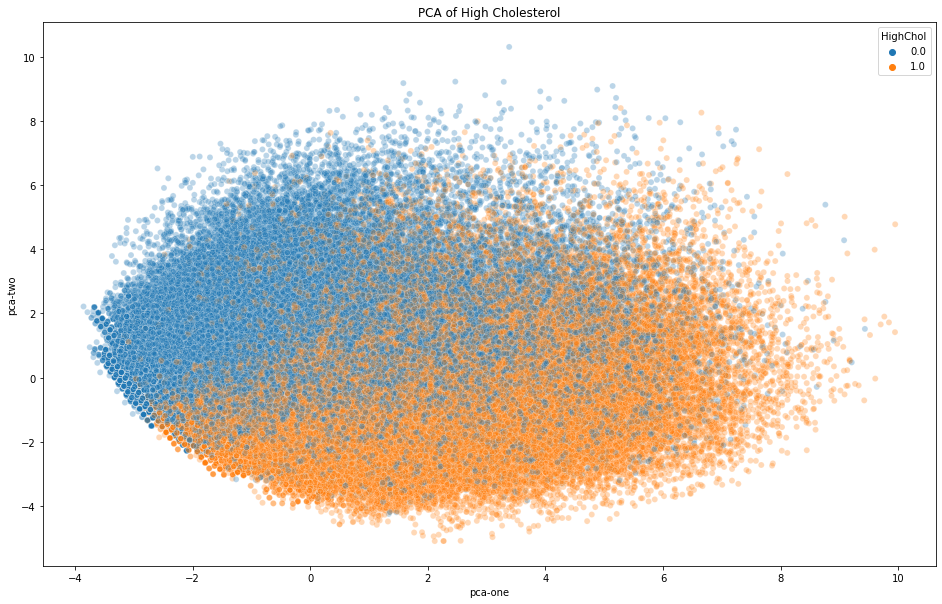

In [42]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two", hue= "HighChol",
    data=df,
    legend="full",
    alpha=0.3
).set(title='PCA of High Cholesterol')

[Text(0.5, 1.0, 'PCA of High Blood Pressure')]

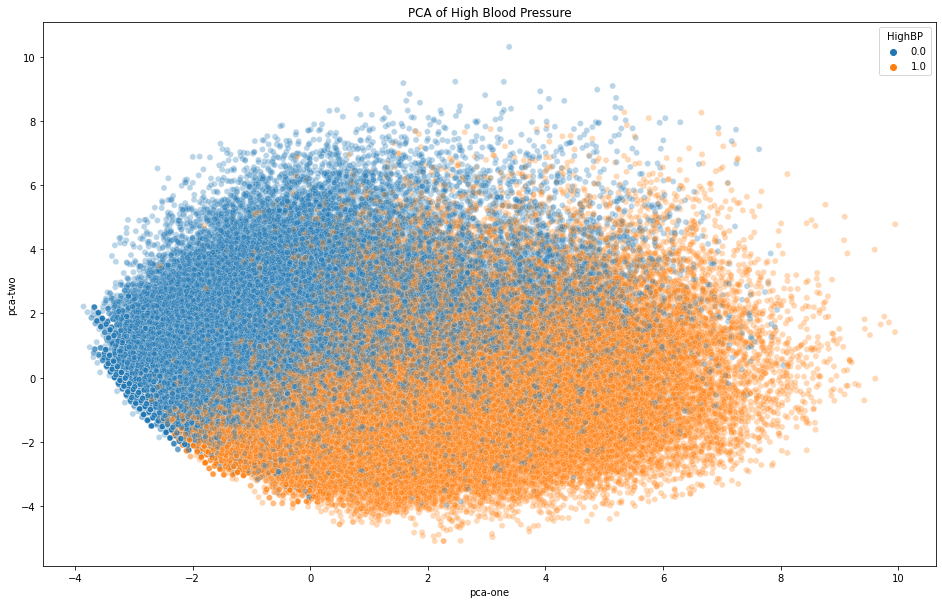

In [43]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two", hue= "HighBP",
    data=df,
    legend="full",
    alpha=0.3
).set(title='PCA of High Blood Pressure')

[Text(0.5, 1.0, 'PCA of Age')]

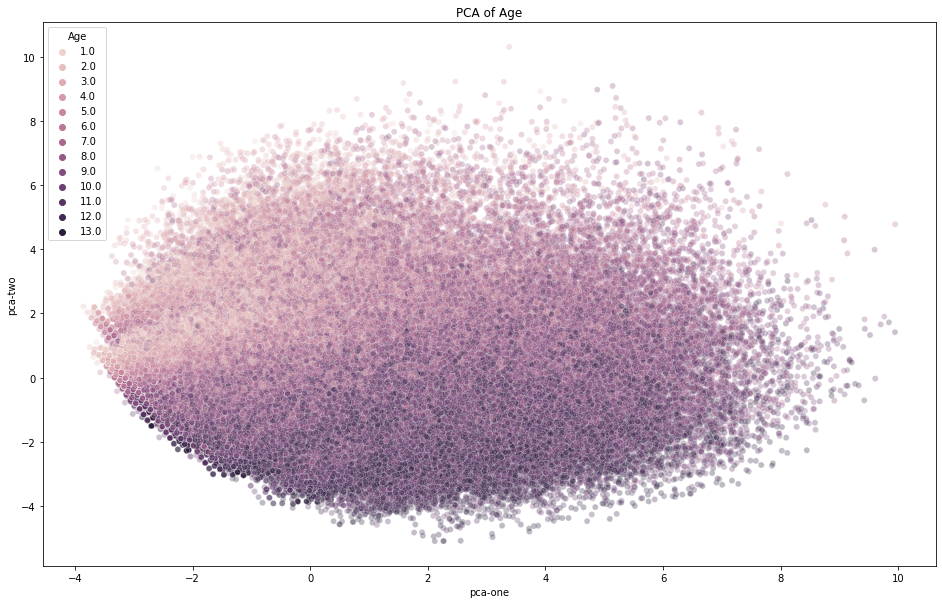

In [44]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two", hue= "Age",
    data=df,
    legend="full",
    alpha=0.3
).set(title='PCA of Age')

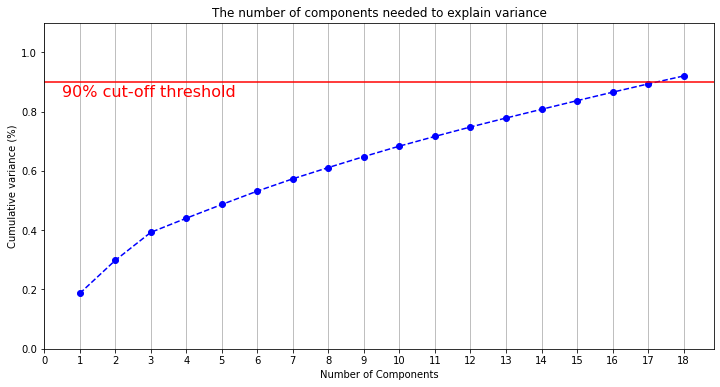

In [37]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 19, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 19, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()